<a href="https://colab.research.google.com/github/pauldiop/IBM-DATA-SCIENCE-COURSE/blob/main/PaulD_Python_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Historical Stock/Revenue Data and Building a Dashboard #
### Question 1 - Extracting Tesla Stock Data Using yfinance ###

In [93]:
import yfinance as yf
import json
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import requests
from bs4 import BeautifulSoup
import pandas as pd
import random
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

tsla = yf.Ticker("TSLA")
tsla_df = tsla.history(period='max')
tsla_df.astype('float64').dtypes

tsla_df.head(10)



,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
2010-07-07 00:00:00-04:00,1.093333,1.108667,0.998667,1.053333,103825500,0.0,0.0
2010-07-08 00:00:00-04:00,1.076000,1.168000,1.038000,1.164000,115671000,0.0,0.0
2010-07-09 00:00:00-04:00,1.172000,1.193333,1.103333,1.160000,60759000,0.0,0.0
2010-07-12 00:00:00-04:00,1.196667,1.204667,1.133333,1.136667,33037500,0.0,0.0


### Question 2 - Extracting Tesla Revenue Data Using Webscraping ###

In [94]:
#Get the revenue for Tesla
user_agents_list = [
    'Mozilla/5.0 (Linux; U; Android 9; SM-J330F Build/PPR1.180610.011; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/79.0.3945.136 Mobile Safari/537.36 OPR/46.0.2254.145391',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/48.0.2564.103 Safari/537.36',

]
headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36"}

url_revenue = "https://companiesmarketcap.com/tesla/revenue/"

tesla_data = requests.get(url_revenue, headers={'User-Agent': random.choice(user_agents_list)})

if tesla_data.status_code == 200:
  print(tesla_data.status_code)
  soup = BeautifulSoup(tesla_data.text, 'html5lib')

  #Year = 2023 (TTM)
  #Revenue = $95.92 B
  tsla_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

  for row in soup.find_all("tbody")[0].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text.replace("(TTM)", "")
    revenue = col[1].text.replace("$", "").replace(",", "").replace("B", "")

    tsla_revenue = tsla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)

  print(tsla_revenue.head())
else:
  print(f'Error getting Tesla {tesla_data.status_code}')




200
    Date Revenue
0  2023   95.92 
1   2022  81.46 
2   2021  53.82 
3   2020  31.53 
4   2019  24.57 


In [111]:
print(tsla_revenue.tail())

    Date Revenue
4   2019  24.57 
3   2020  31.53 
2   2021  53.82 
1   2022  81.46 
0  2023   95.92 


### Bonus getting Tesla Stock using Web Scaping ###

In [57]:
tsla_url = "https://finance.yahoo.com/quote/TSLA/history"
headers = {"User-Agent": "Mozilla/5.0 (platform; rv:geckoversion) Gecko/geckotrail Firefox/firefoxversion"}
data = requests.get(tsla_url, headers=headers)

if data.status_code == 200:
  print(data.status_code)
  soup = BeautifulSoup(data.text, 'html5lib')

  tesla_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

  # First we isolate the body of the table which contains all the information
  # Then we loop through each row and find all the column values for each row
  for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text

    # Finally we append the data of each row to the table
    tesla_data = tesla_data._append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)
  print(tesla_data.head())

else:
  print(f'Error getting Tesla {data.status_code}')



200
           Date    Open    High     Low   Close       Volume Adj Close
0  Feb 16, 2024  202.06  203.17  197.40  199.95  111,173,600    199.95
1  Feb 15, 2024  189.16  200.88  188.86  200.45  120,831,800    200.45
2  Feb 14, 2024  185.30  188.89  183.35  188.71   81,203,000    188.71
3  Feb 13, 2024  183.99  187.26  182.11  184.02   86,759,500    184.02
4  Feb 12, 2024  192.11  194.73  187.28  188.13   95,498,600    188.13


### Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points ###

In [32]:
gamestop = yf.Ticker("GME")
gamestop_df = gamestop.history(period='max')
gamestop_df.astype('float64').dtypes

gamestop_df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
2002-02-21 00:00:00-05:00,1.656318,1.670626,1.641169,1.658001,6976800,0.0,0.0
2002-02-22 00:00:00-05:00,1.670626,1.670626,1.615920,1.628545,3525600,0.0,0.0
2002-02-25 00:00:00-05:00,1.624336,1.653793,1.605821,1.641169,3453600,0.0,0.0
2002-02-26 00:00:00-05:00,1.632753,1.658002,1.606662,1.641169,2761600,0.0,0.0


### Question 4 - Extracting GameStop Revenue Data Using Webscraping  ###

In [112]:
#Get the revenu for gameStop
user_agents_list = [
    'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.83 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36'
]
url_revenue = "https://companiesmarketcap.com/gamestop/revenue/"
gme_data = requests.get(url_revenue, headers={'User-Agent': random.choice(user_agents_list)})
if gme_data.status_code == 200:
  print(gme_data.status_code)
  soup = BeautifulSoup(gme_data.text, 'html5lib')

  gme_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

  for row in soup.find_all("tbody")[0].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text.replace("(TTM)", "")
    revenue = col[1].text.replace("$", "").replace(",", "").replace("B", "")

    gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)

  print(gme_revenue.tail())
else:
  print(f'Error getting GameStop {gme_data.status_code}')

200
    Date Revenue
17  2006   4.68 
18  2005   2.13 
19  2004   1.75 
20  2003   1.47 
21  2002   1.34 


### Bonus getting Gamestop Stock using Web Scraping ###

In [88]:
gme_url = "https://finance.yahoo.com/quote/GME/history"
headers = {"User-Agent": "Mozilla/5.0 (platform; rv:geckoversion) Gecko/geckotrail Firefox/firefoxversion"}
data = requests.get(gme_url, headers=headers)

if data.status_code == 200:
  print(data.status_code)
  soup = BeautifulSoup(data.text, 'html5lib')

  gme_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

  # First we isolate the body of the table which contains all the information
  # Then we loop through each row and find all the column values for each row
  for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text

    # Finally we append the data of each row to the table
    gme_data = gme_data._append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)
  print(gme_data.head())

else:
  print(f'Error getting GameStop {data.status_code}')

200
           Date   Open   High    Low  Close     Volume Adj Close
0  Feb 16, 2024  14.46  14.53  14.10  14.12  2,297,200     14.12
1  Feb 15, 2024  14.54  14.75  14.23  14.51  2,400,500     14.51
2  Feb 14, 2024  14.33  14.43  14.05  14.41  2,504,400     14.41
3  Feb 13, 2024  14.20  14.40  13.77  14.17  3,788,700     14.17
4  Feb 12, 2024  14.58  15.22  14.53  14.73  2,750,100     14.73


### Question 5 - Tesla Stock and Revenue Dashboard - 2 Points ###

In [96]:
def plot_chart_stock(df, name):
  plt.figure(figsize=(14,5))
  sns.set_style("ticks")
  sns.lineplot(data=df,x="Date",y='Close',color='firebrick')
  sns.despine()
  plt.title(name,size='x-large',color='blue')
  plt.show()

def plot_chart_revenue(df, name):
  plt.figure(figsize=(14,5))
  sns.set_style("ticks")
  sns.lineplot(data=df,x="Date",y='Revenue',color='blue')
  sns.despine()
  plt.title(name,size='x-large',color='blue')
  plt.show()



In [98]:
tsla_df.head()




,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [100]:
tsla_revenue.sort_values(by=['Date'], inplace=True)
tsla_revenue.head()

,Date,Revenue
14,2009,0.11
13,2010,0.11
12,2011,0.20
11,2012,0.41
10,2013,2.01


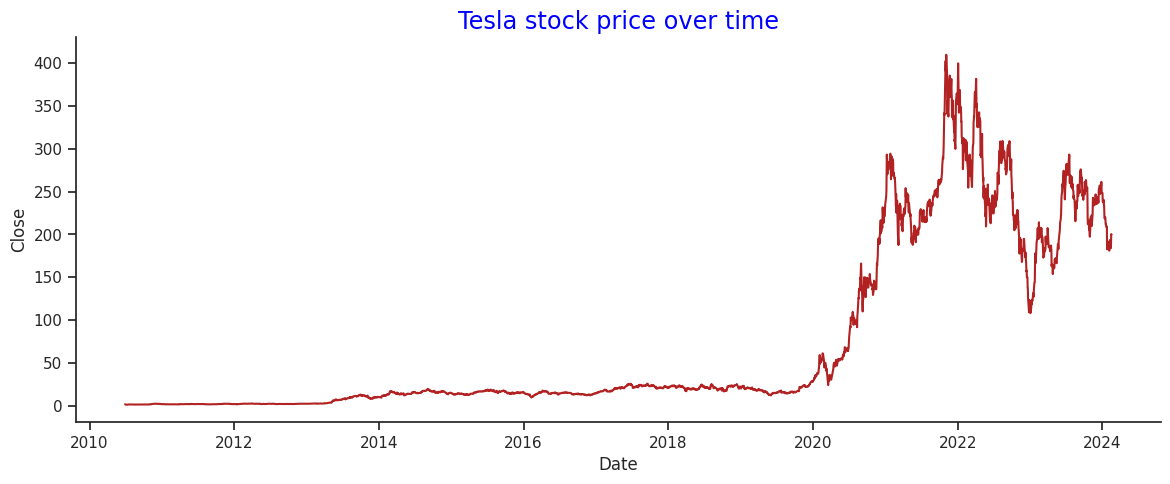

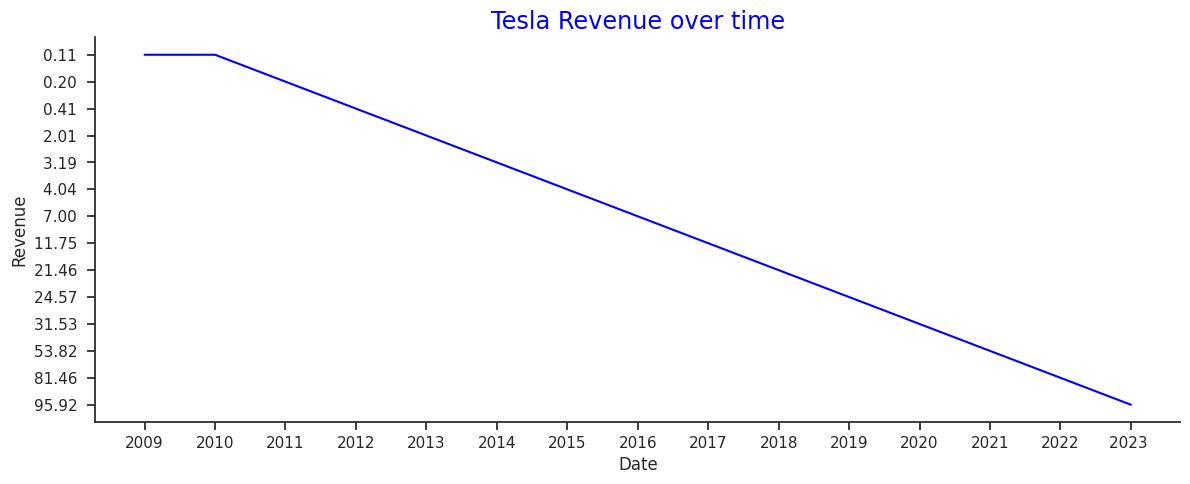

In [102]:
plot_chart_stock(tsla_df, "Tesla stock price over time")
plot_chart_revenue(tsla_revenue, "Tesla Revenue over time")

### Question 6 - GameStop Stock and Revenue Dashboard- 2 Points ###

In [106]:
gamestop_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-12 00:00:00-05:00,14.580000,15.220000,14.530000,14.730000,2750100,0.0,0.0
2024-02-13 00:00:00-05:00,14.200000,14.400000,13.770000,14.170000,3788700,0.0,0.0
2024-02-14 00:00:00-05:00,14.330000,14.430000,14.050000,14.410000,2504400,0.0,0.0


In [109]:
gme_revenue.sort_values(by=['Date'], inplace=True)
gme_revenue.head()

,Date,Revenue
21,2002,1.34
20,2003,1.47
19,2004,1.75
18,2005,2.13
17,2006,4.68


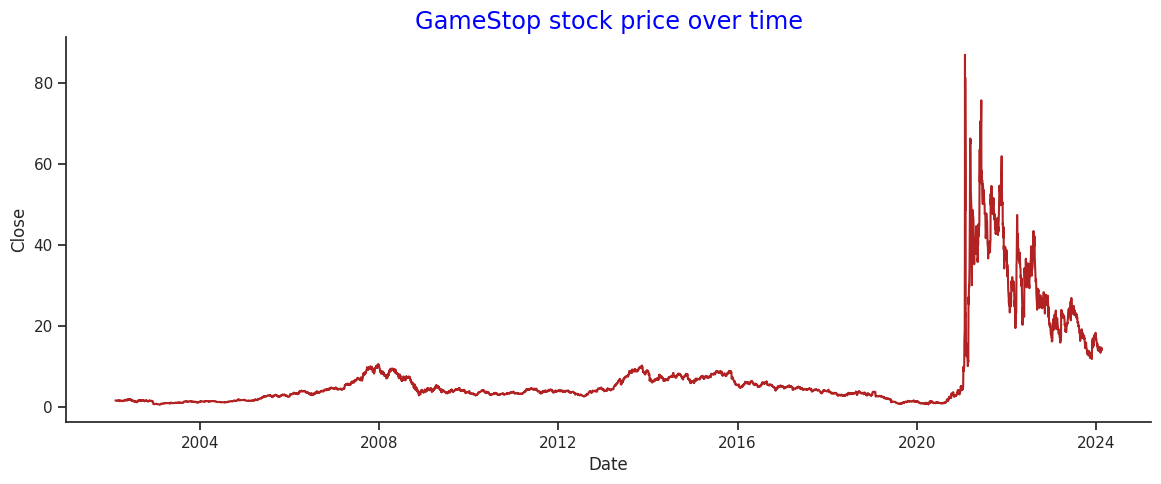

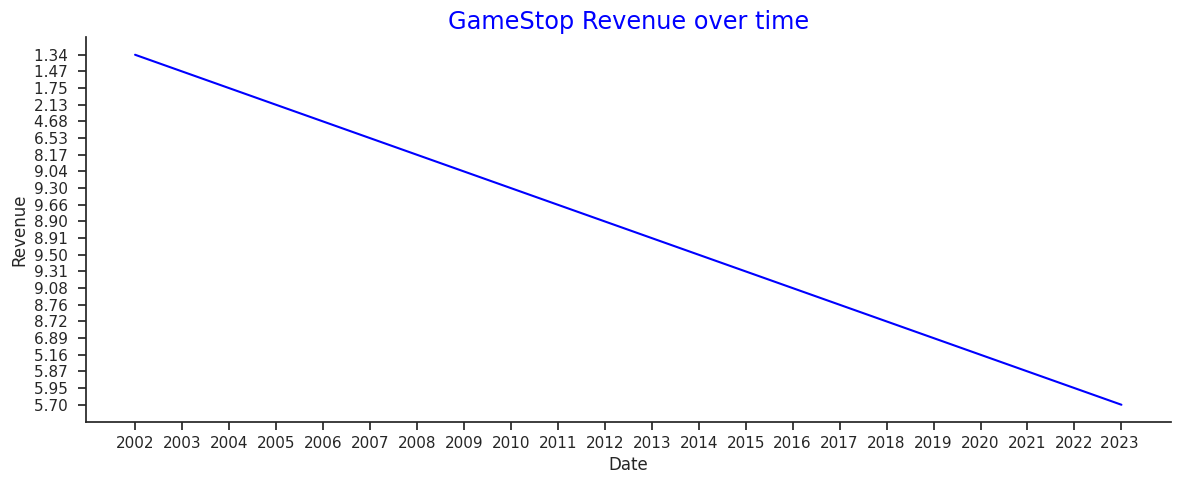

In [110]:
plot_chart_stock(gamestop_df, "GameStop stock price over time")
plot_chart_revenue(gme_revenue, "GameStop Revenue over time")